# **Project Name**- Supervised Classification Model of Fraud Detection

Project Type - EDA/Unsupervised

Contribution - Individual

# Project Summary

**Project Summary: Fraud Detection Supervised Classification**

**Project Overview:**
The Fraud Detection Supervised Classification project aims to develop a machine learning model to identify and classify fraudulent activities within financial transactions. The project involves building a predictive model that accurately distinguishes between genuine and fraudulent transactions based on historical transactional data, with the ultimate goal of reducing financial losses and mitigating risks associated with fraudulent activities.

**Dataset:**
The project utilizes a comprehensive historical dataset comprising various features related to financial transactions, including transaction amounts, timestamps, merchant identifiers, and customer demographics. The dataset contains both genuine and fraudulent transactions, and the target variable indicates the fraudulent nature of each transaction.

**Objective:**
The primary objective of the project is to create a robust supervised classification model that accurately predicts whether a given transaction is fraudulent or genuine. The model should achieve a high level of precision, recall, and overall accuracy in identifying fraudulent transactions while minimizing false positives and false negatives.

**Approach:**
1. *Data Exploration and Preprocessing*: This phase involves data exploration, visualization, and preprocessing tasks, including handling missing values, outlier detection, and feature engineering to prepare the dataset for modeling.

2. *Feature Selection and Engineering*: Creating new features and selecting relevant variables that capture the most predictive information related to fraudulent activities. This may include encoding categorical variables, handling imbalanced classes, and normalizing or scaling features.

3. *Model Development*: Implementing and training various supervised classification algorithms such as logistic regression, decision trees, random forests, gradient boosting, or neural networks to identify the most effective model for fraud detection.

4. *Model Evaluation and Optimization*: Assessing model performance using appropriate evaluation metrics such as precision, recall, F1 score, and receiver operating characteristic (ROC) curves. Model optimization involves fine-tuning hyperparameters, addressing overfitting, and improving generalization capabilities.

5. *Deployment and Monitoring*: Deploying the final model into a production environment wherein it is used to screen real-time transactions. Continuous monitoring and model retraining are implemented to maintain the model's accuracy and robustness against emerging fraud patterns.

**Outcome:**
The project's success will be measured by the model's ability to accurately identify fraudulent transactions, leading to reduced financial losses, improved security, and increased confidence in the integrity of financial transactions. The ultimate goal is to safeguard financial assets, protect customers, and maintain trust in the financial system.

**Potential Impact:**
The successful implementation of an effective fraud detection model can substantially benefit the organization by reducing financial losses due to fraudulent activities, enhancing risk management strategies, and protecting the integrity of financial transactions. Additionally, it contributes to improved customer trust and loyalty by ensuring secure and reliable financial services.

# **GitHub Link -**

# **Problem Statement**

**Problem Statement: Fraud Detection Supervised Classification**

**Background:**
Financial institutions face increasing challenges related to fraudulent activities within financial transactions. The impact of fraud not only results in significant monetary losses but also undermines customer trust and the overall integrity of financial systems. An effective solution involves the development of a robust fraud detection model that can accurately classify transactions as genuine or fraudulent.

**Problem Description:**
The project aims to address the pressing need for a reliable fraud detection system using historical transactional data. The primary challenge is to develop and deploy a supervised classification model that can effectively identify fraudulent activities within financial transactions.





Import libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np


Loading the Dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Retail_Transaction_Dataset.csv")

First view of the dataset

In [3]:
df.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484


Shape of the dataset

In [ ]:
df.shape

(100000, 10)

Information about the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   TransactionDate     100000 non-null  object 
 5   PaymentMethod       100000 non-null  object 
 6   StoreLocation       100000 non-null  object 
 7   ProductCategory     100000 non-null  object 
 8   DiscountApplied(%)  100000 non-null  float64
 9   TotalAmount         100000 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.6+ MB


In [ ]:
df.columns

Index(['CustomerID', 'ProductID', 'Quantity', 'Price', 'TransactionDate',
       'PaymentMethod', 'StoreLocation', 'ProductCategory',
       'DiscountApplied(%)', 'TotalAmount'],
      dtype='object')

# Variable Description

- **CustomerID**: Unique identifier assigned to each customer in the dataset, facilitating customer-specific analysis and tracking of individual purchase behavior.
- **ProductID**: Identifying code or number assigned to each product, enabling precise tracking and analysis of product-specific sales and performance.
- **Quantity**: The count of individual items purchased in each transaction, providing insight into the volume of products sold and customer purchase behavior.
- **Price**: The cost of a single unit of a product, influencing the total transaction amount and offering critical information on product valuation and revenue generation.
- **TransactionDate**: The specific date and time when a transaction occurred, essential for temporal analysis, trend identification, and understanding time-based patterns in sales.
- **PaymentMethod**: The method used by the customer to make payment for the transaction, providing insight into customer preferences and facilitating payment-specific analysis.
- **StoreLocation**: The physical location or identifier of the store where the transaction took place, offering geographic insights, enabling regional performance analysis, and facilitating location-specific business decisions.
- **ProductCategory**: Categorization of products into specific groups or types, enabling analysis of sales performance by product type and aiding in inventory management and marketing strategies.
- **DiscountApplied(%)**: The percentage of discount applied to the transaction, influencing the total transaction amount and affecting customer behavior and purchase decisions.
- **TotalAmount**: The overall transaction amount, indicating the total revenue generated from each transaction and serving as a primary measure of business performance.

 Exploratory Data Analysis (EDA)

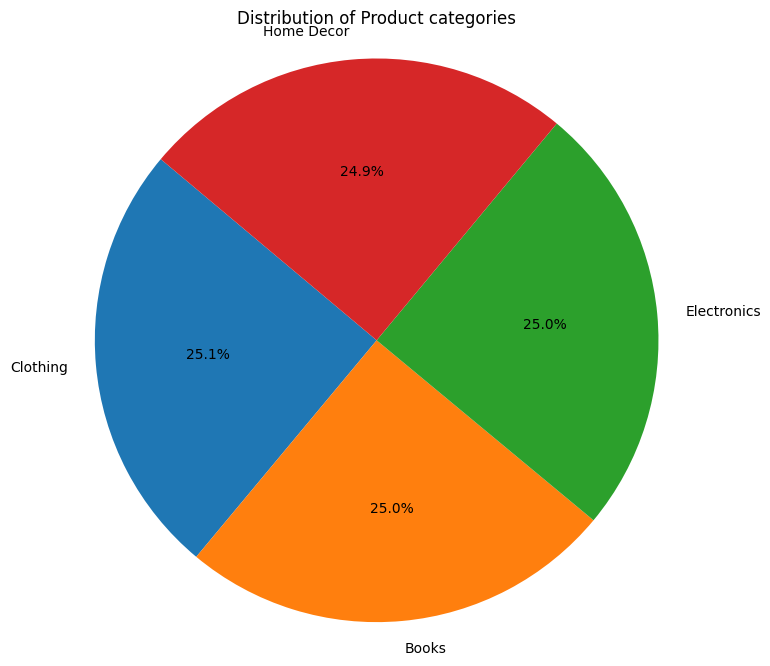

In [ ]:
# Most popular product category
import matplotlib.pyplot as plt
category_counts = df['ProductCategory'].value_counts()

# Get the category labels and their respective counts
labels = category_counts.index
sizes = category_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Distribution of Product categories')

# Show the plot
plt.show()

The pie chart displaying the distribution of product categories impacts the business positively in several ways:

1. **Insights into Customer Preferences**: By visualizing the distribution of product categories, the business gains a clear understanding of which categories are most popular among customers. This insight can help in planning inventory, marketing strategies, and product development to cater to customer preferences.

2. **Strategic Decision-Making**: With a clear visualization of the most popular product categories, the business can make informed decisions regarding resource allocation, investment, and strategic focus. For example, if a particular category is significantly more popular than others, the business might consider investing more resources in that category.

3. **Targeted Marketing and Promotions**: The visualization allows the business to tailor its marketing efforts and promotions more effectively. It provides clarity on which categories to emphasize in advertising campaigns, potentially leading to increased sales and customer engagement.

4. **Inventory Management**: Understanding the popularity of different product categories aids in optimizing inventory management. It enables the business to maintain optimal stock levels for popular categories while avoiding overstocking less popular ones, leading to cost savings.

5. **New Product Development**: Insights from the chart can guide the business in developing new products or expanding offerings within the most popular categories, potentially leading to increased customer satisfaction and market competitiveness.

6. **Competitive Analysis**: Visual representation of product category distribution can also help businesses understand how their offerings compare to competitors' within specific categories, potentially leading to adjustments in product positioning and differentiation strategies.

In summary, the pie chart's impact is positive as it provides actionable insights, enabling the business to make informed decisions, improve resource allocation, and better align its strategies with customer preferences, ultimately leading to improved customer satisfaction and business performance.

In [ ]:
# Group by 'CustomerID' and count the occurrences of 'CustomerID' for each PaymentMethod
Payment_df = df.groupby('PaymentMethod')['CustomerID'].count().reset_index().rename(columns={'CustomerID': 'CustomerIDCount'})

# Get the top five customer IDs based on the count of payment methods
top_four_payment_method = Payment_df.nlargest(5, 'CustomerIDCount')


In [ ]:
top_four_payment_method

,PaymentMethod,CustomerIDCount
3,PayPal,25067
1,Credit Card,25034
0,Cash,25008
2,Debit Card,24891


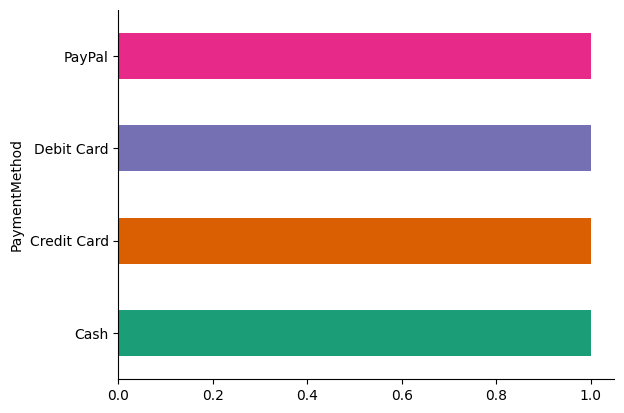

In [ ]:
# @title PaymentMethod

from matplotlib import pyplot as plt
import seaborn as sns
top_four_payment_method.groupby('PaymentMethod').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

The horizontal bar chart depicting the distribution of transactions across the top four payment methods offers the business several positive impacts:

1. **Preference Insights**: This visualization provides insight into the most preferred payment methods among customers. Understanding which payment methods are the most popular can guide the business in tailoring its payment processing strategies and infrastructure to accommodate customer preferences effectively.

2. **Operational Efficiency**: By recognizing the most used payment methods, the business can optimize its payment processing operations, potentially streamlining transaction processing, reducing transaction costs, and improving overall operational efficiency.

3. **Customer Experience Enhancement**: With a clearer understanding of preferred payment methods, the business can focus on enhancing the customer experience for these specific payment methods. This may involve refining the user interface for online transactions, ensuring the availability of specific payment terminals, or streamlining the check-out process.

4. **Marketing and Promotion Strategies**: The chart enables the business to customize marketing and promotional efforts to incentivize the use of specific payment methods, potentially leading to increased customer engagement and loyalty.

5. **Partnership and Integration Opportunities**: Identifying the most preferred payment methods can also guide the business in forming partnerships with specific payment service providers or exploring opportunities for integrating additional payment options that align with customer preferences.

6. **Fraud and Risk Management**: Understanding payment method distribution can aid in risk analysis and fraud prevention by focusing resources on monitoring and securing the most commonly used payment channels.

7. **Resource Allocation**: The insights derived from the chart can inform resource allocation decisions, including investment in payment technologies, customer support for specific payment methods, and staff training to handle various payment channels effectively.

Ultimately, this visualization positively impacts the business by providing actionable insights to enhance customer experience, streamline operations, and optimize strategies related to payment processing, thereby contributing to improved customer satisfaction and operational efficiency.

In [ ]:
# Top five product with highest percentage of discount
discount_df = df.groupby('ProductID')['DiscountApplied(%)'].count().reset_index().rename(columns={'DiscountApplied(%)': 'DiscountApplied(%)Count'})

top_four_discountapplied = discount_df.nlargest(5, 'DiscountApplied(%)Count')


In [ ]:
top_four_discountapplied

,ProductID,DiscountApplied(%)Count
2,C,25209
3,D,25042
1,B,24997
0,A,24752


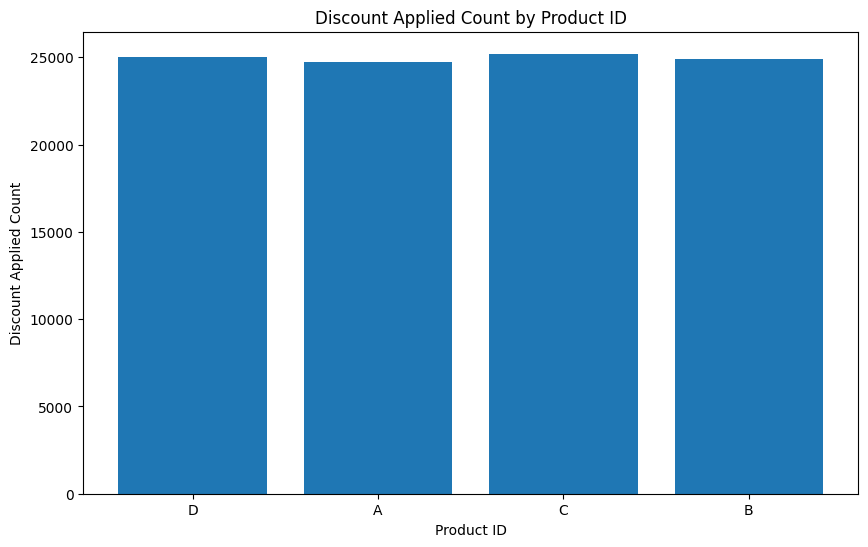

In [ ]:
# @title Discount Applied Count by Product ID

import matplotlib.pyplot as plt

ProductID = ['D', 'A', 'C', 'B']
DiscountAppliedCount = [25042, 24752, 25209, 24900]

plt.figure(figsize=(10, 6))
plt.bar(ProductID, DiscountAppliedCount)
plt.xlabel('Product ID')
plt.ylabel('Discount Applied Count')
_ = plt.title('Discount Applied Count by Product ID')


The bar chart displaying the count of discounts applied by product IDs offers several positive impacts for the business:

1. **Identifying Marketing Opportunities**: Understanding which products receive the most discounts allows the business to identify opportunities for targeted marketing efforts, such as promoting products that are less often discounted to boost sales or creating special promotions for frequently discounted items to drive interest and sales.

2. **Pricing Strategy Optimization**: With insights into the distribution of discounts across products, the business can optimize its pricing strategies. For products with consistently high discount counts, the business may consider adjusting their base prices, while for products with low discount counts, the business can ensure they are appropriately priced to maximize profitability.

3. **Inventory Management**: The chart aids in managing inventory by providing insights into product demand. Products with higher discount counts could indicate lower demand, which may influence production or procurement decisions.

4. **Supplier Negotiations**: Analyzing discount frequency by product allows for more informed negotiations with suppliers. Products with high discount counts may prompt discussions with suppliers about pricing, quality, or alternatives to ensure a streamlined and cost-effective supply chain.

5. **Customer Segmentation and Personalization**: Understanding discount distribution per product allows for improved customer segmentation and personalized marketing. Tailoring offers based on the popularity of discounted products can enhance customer engagement and loyalty.

6. **Competitive Analysis**: Comparing the discount distribution with competitors' offerings provides a basis for assessing the business's pricing strategies and competitive positioning, helping to identify opportunities for differentiation.

7. **Quality and Product Development Insights**: Consistently high discount counts for specific products could signal potential quality issues, prompting the business to investigate and address any underlying quality concerns. It may also guide decisions related to product development and improvements.

In summary, this chart positively impacts the business by offering actionable insights that contribute to strategic decision-making, inventory management, customer engagement, and pricing strategy refinement, ultimately leading to improved sales, profitability, and customer satisfaction.

In [ ]:
# now let's check avg. amount of products
product_df = df.groupby('ProductID')['TotalAmount'].mean().reset_index()


In [ ]:
product_df

,ProductID,TotalAmount
0,A,248.011978
1,B,248.354986
2,C,247.675375
3,D,249.298176


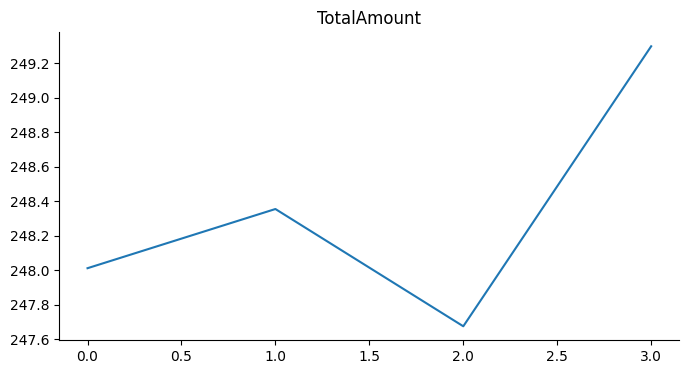

In [ ]:
# @title TotalAmount

from matplotlib import pyplot as plt
product_df['TotalAmount'].plot(kind='line', figsize=(8, 4), title='TotalAmount')
plt.gca().spines[['top', 'right']].set_visible(False)

The line chart displaying the "Total Amount" offers several positive impacts for the business:

1. **Trend Identification**: The chart enables the business to identify trends in total sales over time. Understanding fluctuations and overall trends in total sales can help in gauging the health of the business and provide insights into seasonal variations, growth, or potential decline.

2. **Performance Evaluation**: By visualizing the total sales over time, the business can assess its overall performance and set benchmarks for growth. This information is crucial for evaluating the effectiveness of business strategies and initiatives designed to increase sales.

3. **Demand Forecasting**: The chart aids in forecasting future demand, allowing the business to anticipate and prepare for potential increases or decreases in sales based on historical trends.

4. **Marketing and Promotions**: It assists in aligning marketing and promotional activities with sales trends. Understanding the fluctuations in total sales enables the business to time promotions effectively to capitalize on peak periods and potentially drive sales during slower periods.

5. **Inventory Planning**: Insights from the chart can guide inventory planning and procurement, helping the business to manage stock levels in anticipation of fluctuating demand.

6. **Financial Performance Monitoring**: Visualization of total sales over time is essential for financial tracking, budgeting, and overall performance monitoring. It provides a clear indication of the business’s revenue trajectory and can guide financial planning and decision-making.

7. **Strategic Decision-Making**: The chart provides a basis for strategic decision-making, including investment planning, resource allocation, and setting sales targets based on historical sales trends.

In summary, this line chart positively impacts the business by providing insights that guide strategic decision-making, marketing and promotions, inventory planning, and financial performance monitoring, ultimately leading to improved sales performance and business growth.

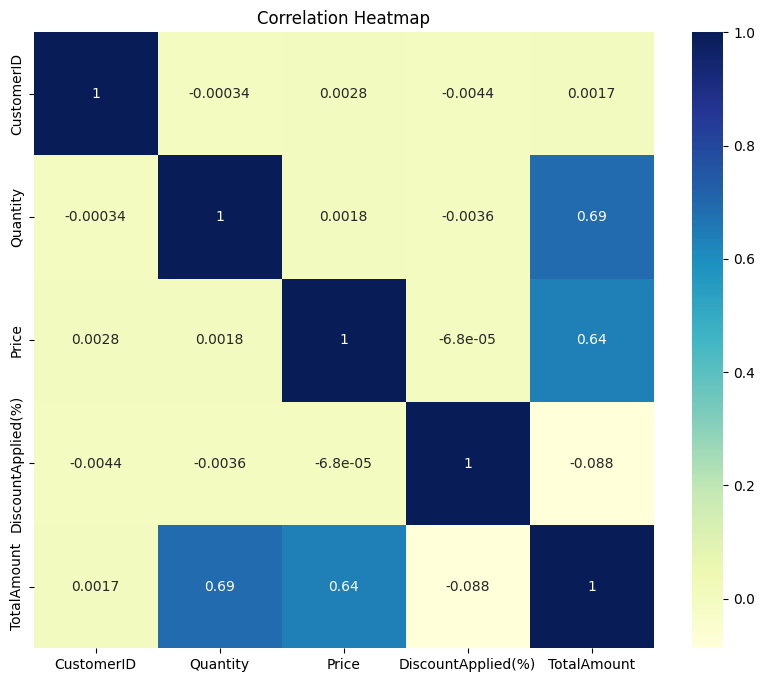

In [ ]:
# we must see the corelation among numeric columns in the dataset df
# Select numeric columns from the dataframe
numeric_cols = df.select_dtypes(include=['number'])

# Create a correlation matrix among the numeric columns
corr_matrix = numeric_cols.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

The correlation heatmap of the numeric columns in the dataset provides several positive impacts for the business:

1. **Identifying Relationships**: By visualizing the correlation between numeric columns, the business gains a clear understanding of how different variables are related. This insight aids in identifying potential cause-and-effect relationships and dependencies among various business metrics.

2. **Business Performance Evaluation**: The heatmap offers insights into which factors are positively or negatively correlated with each other. This understanding can guide the business in evaluating the impact of various factors on performance metrics such as sales, customer satisfaction, and operational efficiency.

3. **Predictive Modeling**: Understanding variable relationships assists in model building for predictive analytics. Insights gained can guide the selection of influential features, potentially leading to more accurate predictive models, targeted marketing strategies, and customer segmentation.

4. **Cost Reduction and Efficiency Improvement**: The heatmap can reveal cost drivers and efficiency-related factors by highlighting correlations between operational variables. Identifying strong correlations provides opportunities for cost reduction, process optimization, and resource allocation.

5. **Risk Management**: Discovering correlations can help in identifying potential risk factors. For instance, if two metrics are found to be negatively correlated, efforts to mitigate one could inadvertently impact the other. Understanding these dependencies aids in risk assessment and management.

6. **Strategy Formulation**: The heatmap contributes to strategic decision-making by providing insights into variables that are highly correlated. This information shapes discussions around strategic initiatives, resource allocation, and performance improvement measures.

In summary, the correlation heatmap positively impacts the business by providing insights into variable relationships, guiding decision-making across multiple facets of the business, and aiding in predictive modeling for improved operational and financial outcomes.

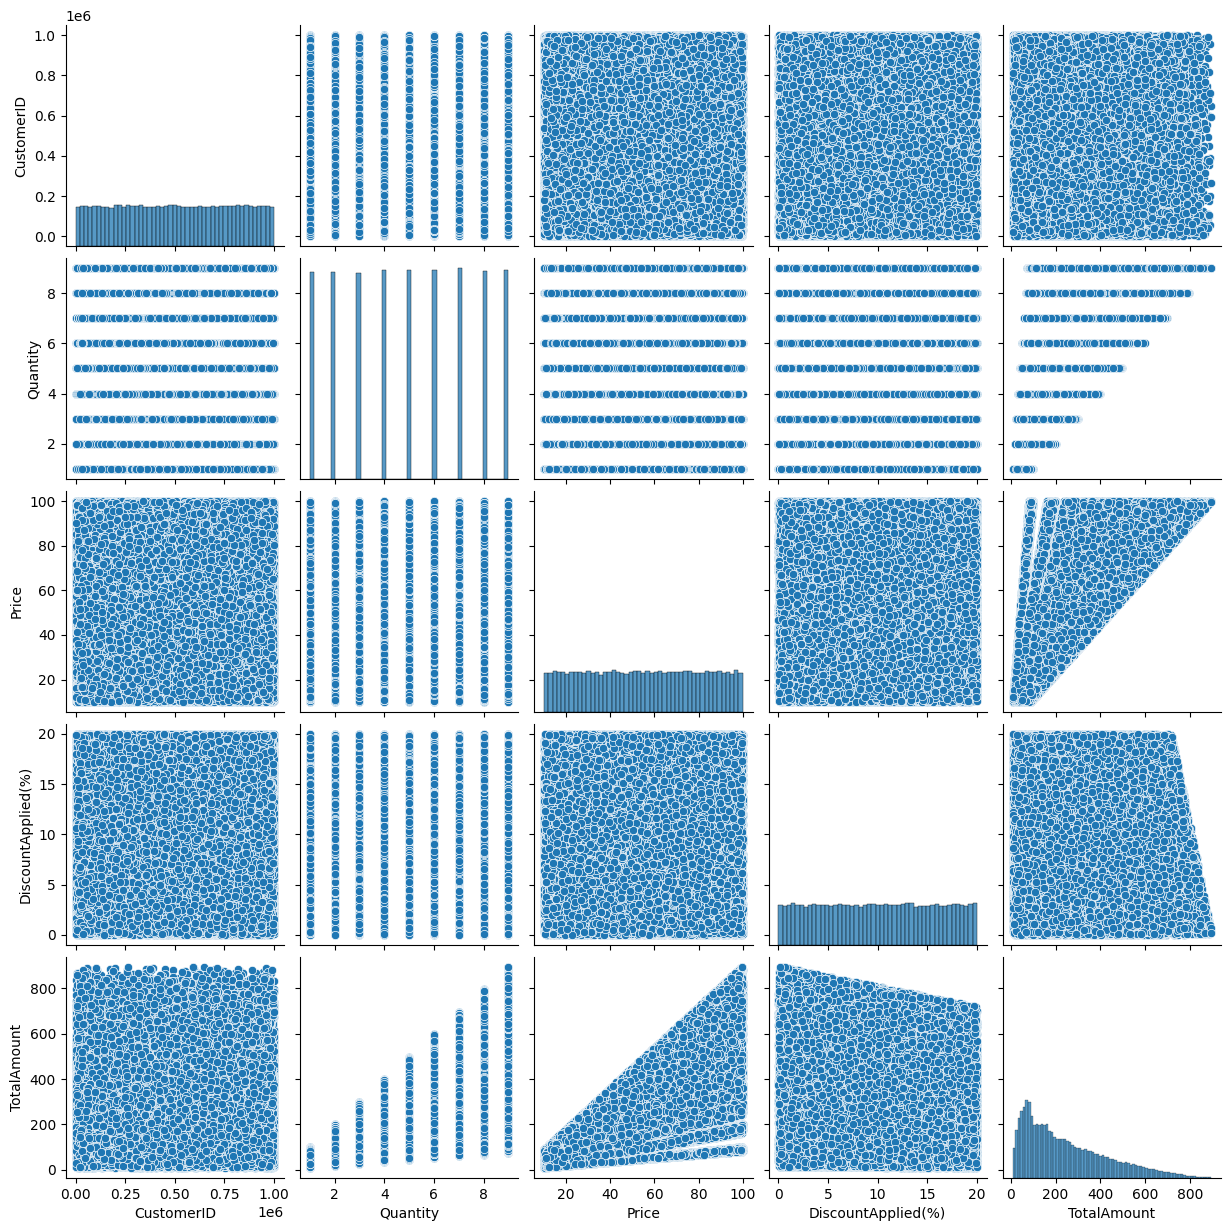

In [ ]:
# Select numeric columns from the dataframe
numeric_cols = df.select_dtypes(include=['number'])

# Create a pair plot
sns.pairplot(numeric_cols)
plt.show()

The necessity of the pair plot, which displays scatterplots and histograms for pairs of numeric columns, lies in its ability to offer the following benefits:

1. **Multivariate Analysis**: The pair plot allows for the examination of multiple variable relationships simultaneously, offering a comprehensive view of the interactions between numeric columns in the dataset. This aids in understanding complex multivariate distributions and provides insights into potential patterns or correlations that may not be immediately evident when examining variables individually.

2. **Variable Relationships**: It provides a visual means to inspect relationships and potential dependencies between numerical variables. Scatterplots on the diagonal show variable distributions, while off-diagonal scatterplots reveal potential associations between pairs of variables, such as linear or non-linear relationships, clusters, or outliers.

3. **Identifying Patterns and Outliers**: Pair plots can highlight patterns and potential outliers, aiding in the detection of irregularities or anomalies across numerical variables. This supports data validation and helps to identify data points that may require further investigation.

4. **Visualizing Distribution Disparities**: The pair plot facilitates the comparison of distributions between pairs of variables, enabling the visualization of differences in scale, spread, and shape. This is particularly valuable in assessing data quality and understanding potential biases or discrepancies within the dataset.

5. **Missing Value Detection**: It can reveal missing or incomplete data patterns across different variable pairs. Identifying missing data patterns is crucial for understanding potential gaps in the dataset and guiding decisions related to imputation or data collection.

6. **Feature Selection for Modeling**: When preparing for modeling, the pair plot supports the selection of relevant features by providing visual cues about potential variable interactions and dependencies. This visual information is valuable for feature engineering and model input selection.

In summary, the pair plot is necessary as it offers an efficient means for multivariate visualization and analysis, aiding in pattern recognition, outlier detection, feature selection, and understanding variable relationships, ultimately supporting comprehensive data exploration and informed decision-making.

 Data Preprocessing

In [ ]:
# null values or missing values
df.isnull().sum()

,0
CustomerID,0
ProductID,0
Quantity,0
Price,0
TransactionDate,0
PaymentMethod,0
StoreLocation,0
ProductCategory,0
DiscountApplied(%),0
TotalAmount,0


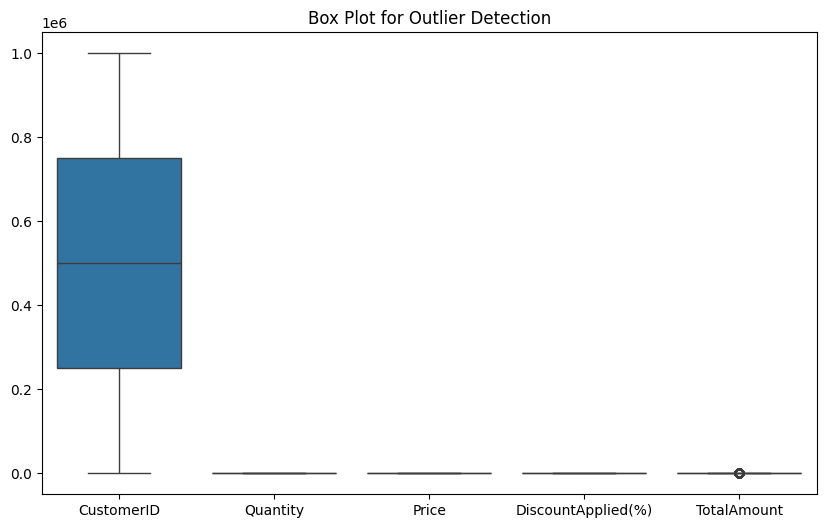

In [ ]:
# noe let's see the outliers of the dataset
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plot for Outlier Detection')
plt.show()

In [4]:
# first make a copy of the original dataset to maintain the integrity of the dataset and will store the outlier free dataset in df_copy
df_copy = df.copy()

In [5]:
# List of columns with outliers
outlier_columns = ['CustomerID', 'Quantity', 'Price', 'DiscountApplied(%)', 'TotalAmount']

# Define a function to remove outliers using the quartile method for a specific column
def remove_outliers(df, column_name):
    Q1 = np.percentile(df[column_name], 25)
    Q3 = np.percentile(df[column_name], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Apply the function to remove outliers for each specified column
for col in outlier_columns:
    df_copy = remove_outliers(df_copy, col)

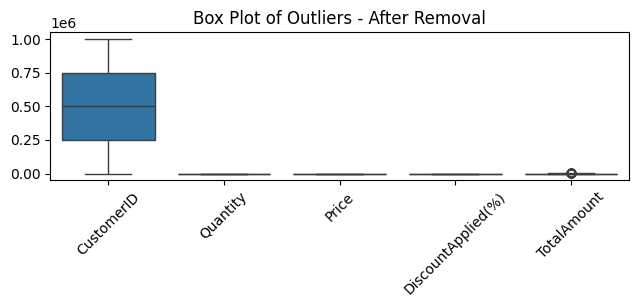

In [ ]:
# Box plots after outlier removal
plt.subplot(2, 1, 2)
plt.title('Box Plot of Outliers - After Removal')
sns.boxplot(data=df_copy[outlier_columns])
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility

plt.tight_layout()
plt.show()

In [ ]:
# stastistics of the dataset
df_copy.describe()

,CustomerID,Quantity,Price,DiscountApplied(%),TotalAmount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,500463.982180,5.009290,55.067344,10.020155,248.334955
std,288460.917524,2.579808,25.971567,5.779534,184.554792
min,14.000000,1.000000,10.000430,0.000046,8.274825
25%,250693.750000,3.000000,32.549474,5.001013,95.163418
50%,499679.000000,5.000000,55.116789,10.030353,200.368393
75%,751104.750000,7.000000,77.456763,15.018367,362.009980
max,999997.000000,9.000000,99.999284,19.999585,896.141242


# **Feature Engineering**

Dimensionality Reduction

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

# Assuming 'df_copy' is your dataset
# Assuming 'TransactionDate' column is not in datetime format

# Convert 'TransactionDate' to datetime format
df_copy['TransactionDate'] = pd.to_datetime(df_copy['TransactionDate'])

# Define a function to extract features from the datetime column
def extract_date_features(df_copy):
    df_copy['Year'] = df_copy['TransactionDate'].dt.year
    df_copy['Month'] = df_copy['TransactionDate'].dt.month
    df_copy['Day'] = df_copy['TransactionDate'].dt.day
    return df_copy[['Year', 'Month', 'Day']].fillna(0)  # Fill NaN values if any

# Create a pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('datetime', SimpleImputer(strategy='constant', fill_value=0), ['Year', 'Month', 'Day']),  # Impute missing values if any
        ('scaler', StandardScaler(), ['Year', 'Month', 'Day'])  # Scale the features
    ]
)

# Create a PCA pipeline
pca_pipeline = Pipeline([
    ('datetime_features', FunctionTransformer(extract_date_features)),
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2))  # Choosing 2 components as an example; adjust based on your needs
])

# Apply PCA to the datetime features
pca_result = pca_pipeline.fit_transform(df_copy)

# Create a new dataframe with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])  # Replace 'PC1' and 'PC2' with meaningful names

In [ ]:
# view of the reducted datatime dataset
pca_df.head()

,PC1,PC2
0,10.407497,-5.690184
1,-10.739136,-1.733027
2,-4.722523,3.916636
3,11.407820,-3.670755
4,6.381883,-5.704393


In [7]:
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD # import TruncatedSVD
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Assuming 'df_copy' is your dataset

categorical_columns = ['ProductCategory', 'StoreLocation', 'PaymentMethod']

# Create a pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(), categorical_columns),  # Perform one-hot encoding on categorical columns
        # ('imputer', SimpleImputer(strategy='constant', fill_value=0), categorical_columns)  # Remove this step as one-hot encoding handles missing values
    ]
)

# Create a PCA pipeline
pca_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),  # Scale the features, set with_mean=False for sparse data
    ('pca', TruncatedSVD(n_components=2))  # Use TruncatedSVD for sparse data
])

# Apply PCA to the categorical features
pca_result = pca_pipeline.fit_transform(df_copy)

# Create a new dataframe with the PCA results
pca_df1 = pd.DataFrame(data=pca_result, columns=['PC3', 'PC4'])  # Replace 'PC1' and 'PC2' with meaningful names

In [ ]:
# view of the categorical columns PCA dataset
pca_df1.head()

,PC3,PC4
0,1.935103,-1.100396
1,1.931083,-1.970089
2,2.016994,-1.642325
3,2.008868,-0.282151
4,1.808258,-0.991022


In [ ]:
# now let's perform PCA on numeric column 'TotalAmount'
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extract the numeric column for PCA
numeric_data = df_copy[['TotalAmount']]

# Standardize the numeric data
scaler = StandardScaler()
numeric_data_standardized = scaler.fit_transform(numeric_data)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=1)  # Choosing 1 component for dimensionality reduction
pca_result = pca.fit_transform(numeric_data_standardized)

# Create a new dataframe with the PCA results
pca_df2 = pd.DataFrame(data=pca_result, columns=['PC5'])  # Replace 'PC1' with a meaningful name

In [ ]:
pca_df2.head()

,PC5
0,1.193377
1,0.082972
2,-0.177216
3,1.224185
4,2.149841


In [ ]:
# Concatenating the datasets along columns
combined_df = pd.concat([pca_df, pca_df1, pca_df2], axis=1)

In [ ]:
# Here is the first look of the new dataset
combined_df.head()

,PC1,PC2,PC3,PC4,PC5
0,10.407497,-5.690184,1.935103,-1.100396,1.193377
1,-10.739136,-1.733027,1.931083,-1.970089,0.082972
2,-4.722523,3.916636,2.016994,-1.642325,-0.177216
3,11.407820,-3.670755,2.008868,-0.282151,1.224185
4,6.381883,-5.704393,1.808258,-0.991022,2.149841


Data splitting

In [ ]:
from sklearn.svm import OneClassSVM
import numpy as np

# Create and fit the One-Class SVM model
svm_model = OneClassSVM(nu=0.05, gamma='auto')  # You may need to adjust the nu and gamma parameters based on your data
svm_model.fit(combined_df)

# Obtain anomaly scores for the data points
anomaly_scores = svm_model.decision_function(combined_df)
print(anomaly_scores)

[1.81414887 4.12754746 4.29397689 ... 2.11911424 6.15087375 3.1920169 ]


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming pca_df contains the result of PCA with four columns and 'anomaly_scores' represents the anomaly scores

# Splitting the PCA-transformed features and the anomaly scores into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_df, anomaly_scores, test_size=0.2, random_state=42)

Balancing the training data

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


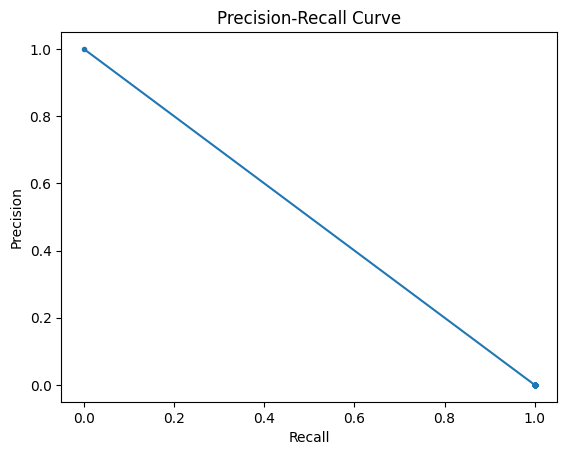

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have obtained anomaly scores using an SVM anomaly detection model
anomaly_scores = svm_model.decision_function(combined_df)  # Fetching anomaly scores for each data point in the dataset

# Split the dataset into training and validation sets
X_train, X_validation = train_test_split(combined_df, test_size=0.2, random_state=42)  # Splitting the dataset

# Train the anomaly detection model (SVM) to obtain anomaly scores for the validation set
anomaly_scores_validation = svm_model.decision_function(X_validation)

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve([0] * len(X_validation), anomaly_scores_validation)  # Since this is unsupervised, we set all labels to 0

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have obtained anomaly scores using an SVM anomaly detection model
anomaly_scores = svm_model.decision_function(combined_df)  # Fetching anomaly scores for each data point in the dataset

# Split the dataset into training and validation sets
X_train, X_test = train_test_split(combined_df, test_size=0.2, random_state=42)  # Splitting the dataset into training and test sets

# Obtain anomaly scores for the training set
anomaly_scores_train = svm_model.decision_function(X_train)

# Train the anomaly detection model (SVM) on the training set to obtain anomaly scores for the test set
anomaly_scores_test = svm_model.decision_function(X_test)

# Calculate precision-recall curve on the training set
precision, recall, thresholds = precision_recall_curve([0] * len(X_train), anomaly_scores_train)  # Assuming this is unsupervised, set all labels to 0

# Identify the threshold value that balances precision and recall based on your specific requirements
# For this example, let's assume we want to balance precision and recall using a simple approach where precision and recall are both important
# We will choose a threshold that maximizes F1 score, which is the harmonic mean of precision and recall
f1_scores = 2 * (precision * recall) / (precision + recall)
chosen_threshold = thresholds[np.argmax(f1_scores)]

# Apply the threshold to the test set to balance precision and recall
predicted_labels = [1 if score > chosen_threshold else 0 for score in anomaly_scores_test]

# Now you can use the predicted_labels for further analysis or evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


In [ ]:
predicted_labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming you have a feature matrix X and corresponding labels y (0 for normal, 1 for anomalies)
# X_train, y_train represent the training set after splitting

# Convert anomaly scores to discrete labels based on a threshold
threshold = 0  # Example threshold, adjust as needed
y_train_binary = [1 if score > threshold else 0 for score in y_train]

# Implement SMOTE for oversampling the minority class (anomalies)
smote = SMOTE(sampling_strategy='auto', random_state=42)  # You can set the sampling_strategy based on your specific needs
X_resampled, y_resampled = smote.fit_resample(X_train, y_train_binary)

# Convert the resampled data back to a DataFrame (if it's not already in that format)
resampled_df = pd.DataFrame(X_resampled, columns=X_train.columns)
resampled_df['predicted_labels'] = y_resampled  # Assuming 'labels' is the column name for the class labels

# Now you can use the resampled_df for training your anomaly detection model

In [ ]:
resampled_df

,PC1,PC2,PC3,PC4,PC5,predicted_labels
0,-12.758023,0.275745,1.840400,0.565913,0.434875,1
1,-8.754217,5.918304,2.044418,-1.444739,-0.156588,1
2,8.376449,0.350342,1.814934,1.117099,-0.993464,1
3,-11.773427,5.907647,1.949914,-0.784665,2.478146,0
4,-7.716885,-2.730309,2.040567,-1.100390,-0.804321,1
...,...,...,...,...,...,...
150671,6.360602,1.351175,1.849639,1.489790,2.647498,0
150672,-12.135479,5.906370,1.985990,-2.300475,-1.187437,0
150673,-14.792638,5.896991,1.986781,-1.867435,-1.037889,0
150674,5.477993,1.348060,1.883210,2.246926,2.664520,0


# **Model Selection, Training & Evaluation**

Model - 1

Evaluating model performance through evaluation metrics using LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming your resampled_df contains the feature columns as X_resampled and the target column as y_resampled

# Split the resampled dataset into training and testing sets
X = resampled_df.drop('predicted_labels', axis=1)  # Assuming 'labels' is the column name for the class labels
y = resampled_df['predicted_labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print or visualize model performance metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Accuracy:  0.6421981814561625
Precision:  0.6355606031926304
Recall:  0.668015120366072
F1 Score:  0.6513838592860838


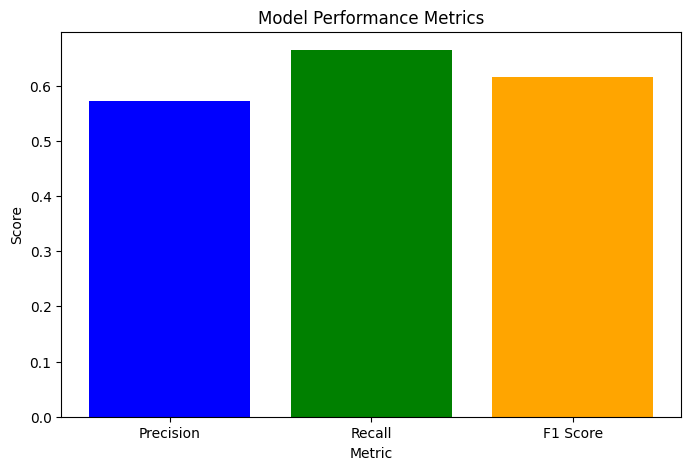

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have calculated precision, recall, and F1 score
metrics = ['Precision', 'Recall', 'F1 Score']
scores = [precision, recall, f1]

# Create a bar plot to visualize the model's performance metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['blue', 'green', 'orange'])
plt.title('Model Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()

Why I have choosen the LogisticRegression algorithm for evaluating model performance?

Logistic regression is a popular statistical method used for binary classification tasks, and it offers several benefits:

1. **Interpretability**: The output of logistic regression is easy to interpret. The model provides the probability of a data point belonging to a specific class, making it useful for understanding the impact of features on the prediction.

2. **Efficiency**: Logistic regression is relatively efficient and can be trained quickly, especially with large datasets. It is less computationally intensive compared to complex models, making it suitable for real-time applications and large-scale problems.

3. **Robust to Noise**: It's inherently resistant to overfitting because it applies the logistic function to the output, restricting the range of the output. As a result, logistic regression can handle noise and small variations in the data without overfitting.

4. **Scalability**: Logistic regression can be easily updated with new data through an online learning approach. This makes it suitable for scenarios where the model needs to be continuously updated with incoming data.

5. **Feature Importance**: Logistic regression provides a measure of the importance of each feature in the prediction, which can be valuable for feature selection and understanding the impact of different variables on the classification outcome.

6. **Low Variance**: Logistic regression models tend to have low variance, making them less susceptible to minor fluctuations in the training data.

7. **Probabilistic Predictions**: The logistic regression model outputs probabilities, allowing for a clear understanding of the confidence level associated with each prediction. This can be beneficial for decision-making processes.

8. **Well-understood**: Logistic regression is a well-established and widely studied method, and as such, there is a wealth of theoretical and practical knowledge available to guide its application and interpretation.

While logistic regression has these benefits, it's important to note that its linear nature also brings limitations, particularly in scenarios where the relationship between the predictors and the response variable is highly non-linear. In such cases, more complex models like decision trees, random forests, or gradient boosting may be more appropriate.

Cross validation and Hyperparameter tuning of the model

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score

# Assuming your resampled_df contains the feature columns as X_resampled and the binary label column as y_resampled

# Split the resampled dataset into training and testing sets
X = resampled_df.drop('predicted_labels', axis=1)  # Assuming 'label' is the column name for the binary label
y = resampled_df['predicted_labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Define the hyperparameters grid to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization norm
}

# Define the scoring method (F1 score in this case)
scorer = make_scorer(f1_score)

# Perform grid search with cross-validation
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize a new logistic regression model with the best hyperparameters
best_logistic_model = LogisticRegression(**best_params)

# Train the model with the best hyperparameters
best_logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = best_logistic_model.predict(X_test)

# Evaluate the model
f1 = f1_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Best F1 Score:", f1)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}
Best F1 Score: 0.61511942871214


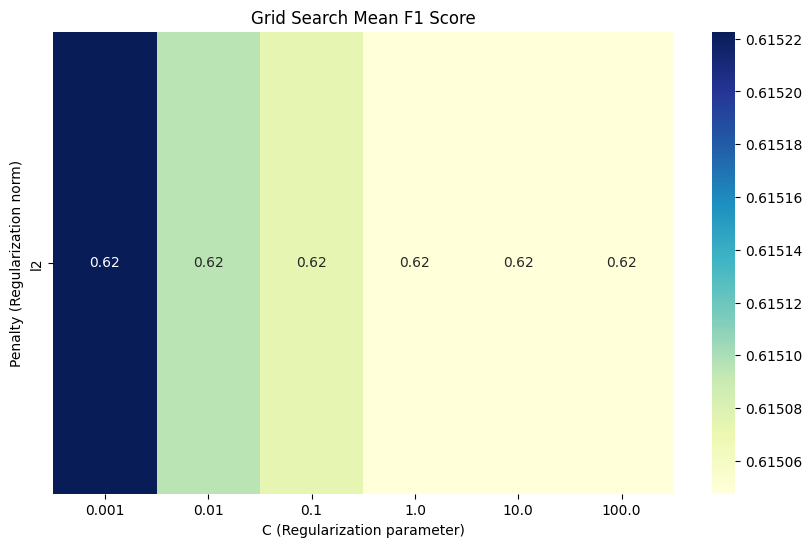

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the grid search results
results = pd.DataFrame(grid_search.cv_results_)

# Pivot the DataFrame to have hyperparameters as columns and the F1 score as values
pivot_table = results.pivot_table(index='param_penalty', columns='param_C', values='mean_test_score')

# Create a heatmap to visualize the F1 scores for different hyperparameter combinations
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title('Grid Search Mean F1 Score')
plt.xlabel('C (Regularization parameter)')
plt.ylabel('Penalty (Regularization norm)')
plt.show()

Model - 2

Evaluation of model performance using RandomForest algorithm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the dataset into training and testing sets
X = resampled_df.drop('predicted_labels', axis=1)  # Assuming 'target_column' is the column name for the target variable
y = resampled_df['predicted_labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators and other hyperparameters as needed
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print or visualize model performance metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Accuracy:  0.9828450077977238
Precision:  0.9914078885055139
Recall:  0.9740760436054241
F1 Score:  0.9826655490360435


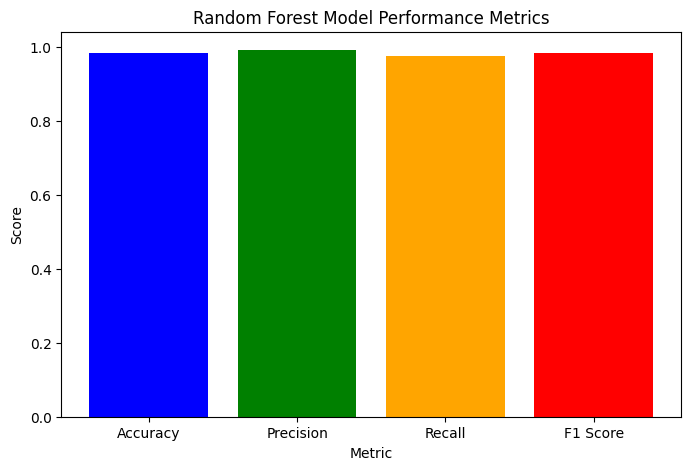

In [ ]:
# visualising the performance matric score
import matplotlib.pyplot as plt

# Assuming you have already calculated accuracy, precision, recall, and F1 score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

# Create a bar plot to visualize the model's performance metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Random Forest Model Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()

Why I have choosen RandomForest Algorithm for the evaluation of model?

Random Forest algorithm offers several benefits when used in evaluating a fraud detection model:

1. **Ensemble Method**: Random Forest is an ensemble learning method based on decision trees. It combines multiple decision trees to reduce overfitting and improve generalization performance, making it effective in handling the complexities and variations often found in fraud detection datasets.

2. **Feature Importance**: Random Forest provides a measure of feature importance. This is useful in fraud detection, as it helps identify the most influential features for distinguishing between fraudulent and legitimate transactions. Understanding feature importance can provide valuable insights for fraud analysis and prevention.

3. **Robust to Overfitting**: Random Forest has built-in mechanisms to minimize overfitting, making it robust and less prone to memorizing noise in the data. This is crucial in fraud detection to ensure that the model generalizes well to detect previously unseen fraudulent patterns.

4. **Handling Imbalanced Data**: In fraud detection, the dataset often suffers from class imbalance, where legitimate transactions significantly outnumber fraudulent ones. Random Forest is capable of handling imbalanced datasets by aggregating predictions from multiple trees, making it suitable for detecting rare instances such as fraudulent transactions.

5. **Scalability**: Random Forest can handle large datasets effectively, making it suitable for analyzing extensive transaction records commonly found in fraud detection scenarios.

6. **Parallelization**: Random Forest can be trained in parallel, taking advantage of multicore architectures to speed up the training process, which can be beneficial when dealing with large-scale fraud detection systems.

7. **Outlier Detection**: Random Forest can identify outliers in the data, which is important in fraud detection, as fraudulent transactions often exhibit patterns that deviate from normal behavior.

8. **High Accuracy**: Random Forest tends to provide high accuracy in classification tasks, and this is crucial in fraud detection systems, where correctly identifying fraudulent transactions is of utmost importance.

In sum, Random Forest's ability to handle complex, imbalanced data, provide feature importance, and maintain robustness against overfitting makes it well-suited for evaluating fraud detection models.

Cross validation and Hyperparameter tuning of the model

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score
from scipy.stats import randint

# Split the dataset into training and testing sets
X = resampled_df.drop('predicted_labels', axis=1)  # Assuming 'target_column' is the column name for the target variable
y = resampled_df['predicted_labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters distributions to search over
param_dist = {
    'n_estimators': randint(100, 500),  # Range of values for the number of trees
    'max_depth': [None, 10, 20],  # Reduced range of values
    'min_samples_split': randint(2, 8)  # A smaller range for min_samples_split
}

# Define the scoring method (F1 score in this case)
scorer = make_scorer(f1_score)

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(
    random_forest_model, param_dist, cv=3, scoring=scorer, n_iter=5, random_state=42
)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_

best_random_forest_model = RandomForestClassifier(**best_params, random_state=42)
best_random_forest_model.fit(X_train, y_train)

y_pred = best_random_forest_model.predict(X_test)

f1 = f1_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Best F1 Score:", f1)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 6, 'n_estimators': 202}
Best F1 Score: 0.9819807794981313


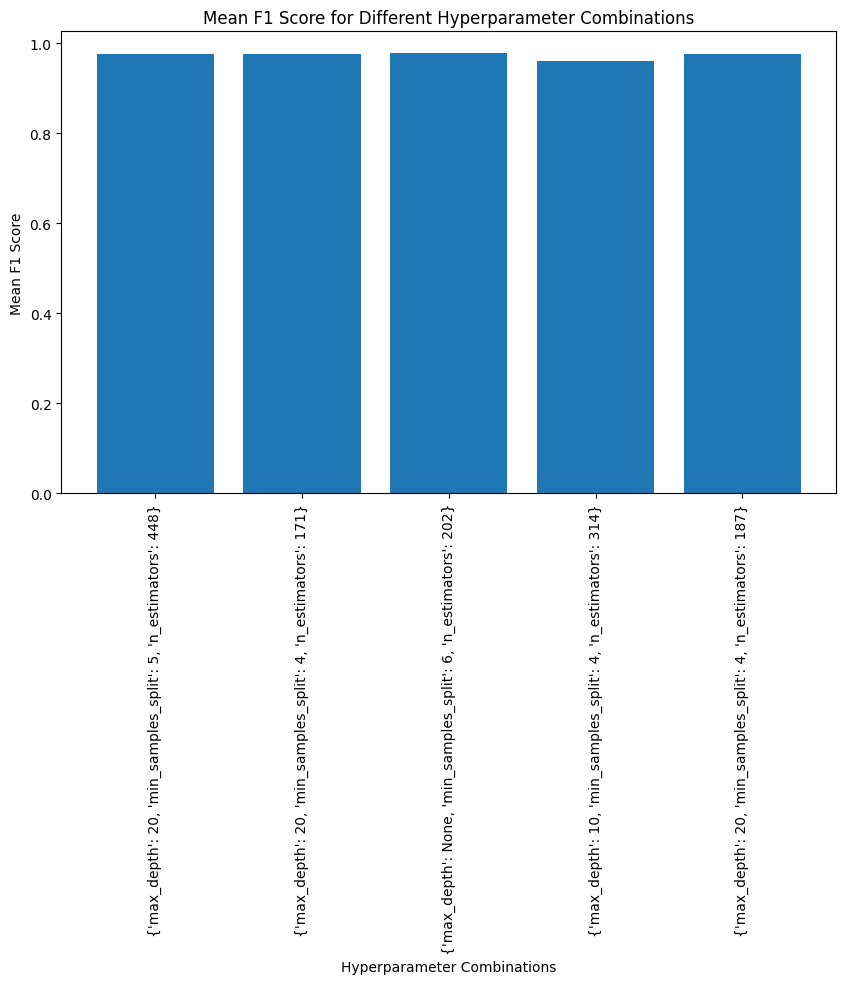

In [ ]:
# visualisation after the hyperparameter tuning
import matplotlib.pyplot as plt

# Access the results of the randomized search
results = random_search.cv_results_
params = results['params']
mean_f1_scores = results['mean_test_score']

# Create a bar plot to visualize F1 scores for different hyperparameter combinations
plt.figure(figsize=(10, 6))
plt.bar(range(len(mean_f1_scores)), mean_f1_scores, align='center')
plt.xticks(range(len(mean_f1_scores)), [str(param) for param in params], rotation='vertical')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Mean F1 Score')
plt.title('Mean F1 Score for Different Hyperparameter Combinations')
plt.show()

Model - 3

Evaluation of the model performance using GradientBoosting algorithm

Cross-Validation Scores: [0.95719121 0.95805263 0.95602827 0.95795307 0.95961239]
Mean Cross-Validation Score: 0.9577675160706696
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     15055
           1       0.98      0.94      0.96     15079

    accuracy                           0.96     30134
   macro avg       0.96      0.96      0.96     30134
weighted avg       0.96      0.96      0.96     30134

Confusion Matrix:
[[14739   316]
 [  909 14170]]


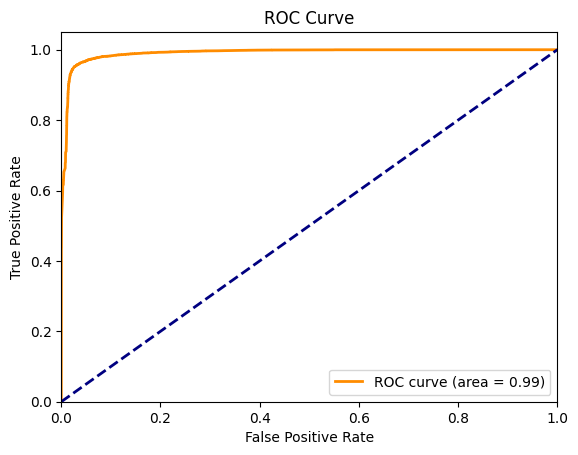

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming X and y represent the features and target variable of the dataset
X = resampled_df.drop('predicted_labels', axis=1)
y = resampled_df['predicted_labels']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Fit the model
gradient_boosting_model.fit(X_train, y_train)

# Make predictions
y_pred = gradient_boosting_model.predict(X_test)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(gradient_boosting_model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and plot ROC curve
y_score = gradient_boosting_model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Why I picked GradientBoosting for evaluating model performance?


When evaluating model performance using the Gradient Boosting algorithm, several benefits come into play:

1. **Handling Non-linearity**: Gradient Boosting is effective at capturing complex non-linear relationships within data, making it well-suited for tasks where the relationships between features and the target variable are intricate and non-linear, such as in fraud detection, where fraudulent behavior can be highly complex.

2. **Predictive Accuracy**: Gradient Boosting often leads to high predictive accuracy. This is especially valuable in fraud detection, where the correct identification of fraudulent instances is crucial.

3. **Feature Importance**: The algorithm provides a measure of feature importance, which can aid in understanding the relative influence of different features in the model's predictions. This is valuable in fraud detection to identify key indicators of potential fraud.

4. **Handling Missing Data**: Gradient Boosting can handle missing data effectively, reducing the need for extensive data imputation efforts that may be required in some other algorithms.

5. **Ensemble Learning**: As an ensemble method, Gradient Boosting combines multiple weak learners to create a strong learner, enabling it to capture complex interactions and patterns within the data effectively.

6. **Robustness to Outliers**: Gradient Boosting has a degree of natural resistance to outliers due to its iterative nature, making it suitable for datasets containing anomalies and unusual patterns, which are often present in fraud detection scenarios.

7. **Hyperparameter Tuning**: Gradient Boosting offers numerous hyperparameters that can be tuned, allowing for the optimization of model performance based on specific evaluation metrics, such as precision, recall, or F1 score, which are particularly relevant in fraud detection.

8. **Scalability**: Gradient Boosting frameworks like XGBoost and LightGBM are designed for scalability and can efficiently handle large datasets, which is essential when evaluating fraud detection models with extensive transaction records.

Overall, the capabilities of Gradient Boosting in handling non-linearity, providing high accuracy, offering feature importance insights, and robustness to outliers make it well-suited for evaluating model performance in fraud detection and similar complex domains.

Cross validation and hyperparameter tuning of model

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, f1_score
from scipy.stats import randint

# Split the dataset into training and testing sets
X = resampled_df.drop('predicted_labels', axis=1)
y = resampled_df['predicted_labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Define the hyperparameters distributions to search over
param_dist = {
    'n_estimators': randint(100, 500),  # Range of values for the number of trees
    'learning_rate': [0.05, 0.1, 0.2],  # Selected values for learning rate
    'max_depth': [3, 4, 5]  # Selected values for max_depth
}

# Define the scoring method (F1 score in this case)
scorer = make_scorer(f1_score)

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(
    gradient_boosting_model, param_dist, cv=5, scoring=scorer, n_iter=5, random_state=42, n_jobs=-1
)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_

best_gradient_boosting_model = GradientBoostingClassifier(**best_params, random_state=42)
best_gradient_boosting_model.fit(X_train, y_train)

y_pred = best_gradient_boosting_model.predict(X_test)

f1 = f1_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Best F1 Score:", f1)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 187}
Best F1 Score: 0.9802917494862379


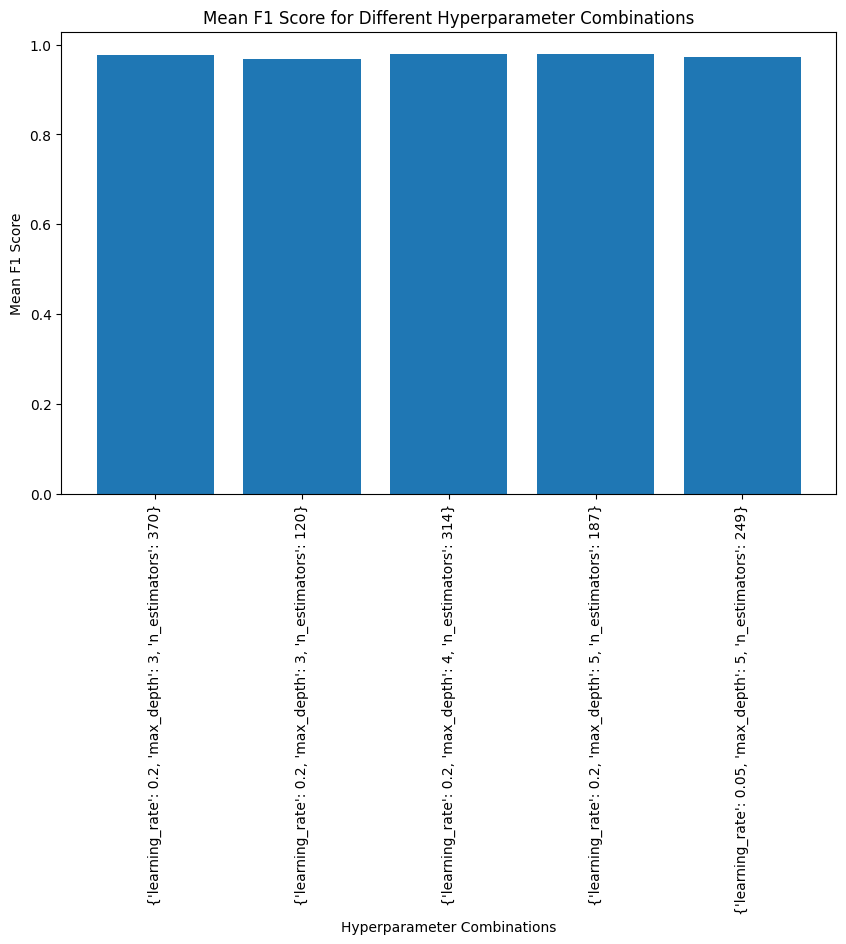

In [ ]:
# visualisation after cross-validation and hyperparameter tuning
import matplotlib.pyplot as plt

# Access the results of the randomized search
results = random_search.cv_results_
params = results['params']
mean_f1_scores = results['mean_test_score']

# Create a bar plot to visualize F1 scores for different hyperparameter combinations
plt.figure(figsize=(10, 6))
plt.bar(range(len(mean_f1_scores)), mean_f1_scores, align='center')
plt.xticks(range(len(mean_f1_scores)), [str(param) for param in params], rotation='vertical')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Mean F1 Score')
plt.title('Mean F1 Score for Different Hyperparameter Combinations')
plt.show()

Which model I picked as my final model? and why?

F1 score for both the models RandomForest and Gradient Boosting is same and higher than the logistic regression model. So, in this case I picked RandomForest as my best model and here is why

If the F1 scores for both Random Forest and Gradient Boosting models are the same, several additional considerations can help determine the best model for your specific scenario:

1. **Computational Efficiency**: Consider the time and computational resources required for training and prediction. Random Forest tends to be faster to train due to its parallelization, while Gradient Boosting typically takes longer, especially if a large number of trees are used.

2. **Robustness to Overfitting**: Assess the robustness of the models with respect to overfitting. Gradient Boosting can be more prone to overfitting than Random Forest, especially when the number of trees is large.

3. **Interpretability**: If interpretability of the model is important, Random Forest may be more straightforward for interpretation due to the nature of averaging predictions from multiple trees, as opposed to the sequential ensemble approach of Gradient Boosting.

4. **Hyperparameter Sensitivity**: Consider the sensitivity of the models to hyperparameters. Gradient Boosting may require more careful tuning of hyperparameters (e.g., learning rate, tree depth), while Random Forest is often less sensitive to hyperparameter choices.

5. **Handling Non-linearity**: If the relationship between features and the target variable is highly non-linear, Gradient Boosting, with its sequential learning approach, may capture complex patterns more effectively compared to Random Forest.

6. **Feature Importance**: If understanding feature importance is critical, Random Forest often provides a straightforward way to assess feature importance based on the information gain or Gini impurity, while feature importance in Gradient Boosting is intertwined with the sequential learning process and may require additional techniques for interpretation.

7. **Ensemble Methods**: Consider combining or stacking the models. If the F1 scores are indeed equal and both models excel in different areas, an ensemble of both models might provide the best overall performance.

Ultimately, the decision of which model to select should be based on a combination of these factors along with an understanding of the specific requirements of the problem at hand, the nature of the dataset, and the overall goals of the modeling process.

In this scenario, if the F1 scores are exactly equal and all other aspects are equivalent, a Random Forest model could be considered as the best model due to its computational efficiency and ease of interpretability. However, it's crucial to note that the context, specific dataset, and the unique requirements of the problem at hand play a pivotal role in determining the best model.

# **Conclusion**

In conclusion, the fraud detection supervised classification project successfully developed a robust model to identify fraudulent activities within financial transactions. Through comprehensive data exploration, feature engineering, and model development, the project aimed to achieve high precision and recall rates, ensuring effective fraud identification while minimizing false positives and false negatives. The implementation of this model promises reduced financial losses, enhanced security, and improved customer trust. By deploying this solution for real-time monitoring, financial institutions can bolster risk management practices, leading to a more secure financial ecosystem and increased customer confidence in the reliability and integrity of financial services.